In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [6]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [7]:
tf.test.is_built_with_cuda()

True

In [12]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [14]:
x_train.shape

(50000, 32, 32, 3)

In [15]:
x_train[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [16]:
y_train.shape

(50000, 1)

In [17]:
x_train.shape

(50000, 32, 32, 3)

In [18]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [43]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(x_train[index])

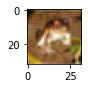

In [44]:
plot_sample(0)

In [46]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [47]:
x_train_scaled.shape

(50000, 32, 32, 3)

In [51]:
y_train_categorical = keras.utils.to_categorical(
    y_train,num_classes = 10,dtype='float32'
)

In [53]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [54]:
y_test_categorical = keras.utils.to_categorical(
    y_test,num_classes = 10,dtype='float32'
)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='SGD',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

model.fit(x_train_scaled,y_train_categorical,epochs=1)

In [ ]:
model.predict(x_test_scaled)[0]